## A Origem dos Jogadores - Quais os jogadores do seu nível ?

Sistema de pesquisa que recebe como parâmetros os atributos de uma pessoa, e retorna os 10 jogadores mais semelhantes.

### 1º Passo - Importação

Importando as bibliotecas necessárias e o dataset.

In [16]:
import pandas as pd
import numpy as np

In [15]:
data = pd.read_csv('archive/male_players.csv',low_memory=False)

### 2º Passo - Preparação

A partir do dataset principal iremos criar um dataset com as informações relevantes para nossa pesquisa.

In [17]:
#Retirando os goleiros da comparação
positions = data[data["player_positions"] != "GK"]

In [4]:
#Separando os atributos gerais mais significantes já que o dataset é muito extenso e possui muitas informações.

columns_of_interest = ["short_name", "player_positions", "movement_sprint_speed",
                       "defending_marking_awareness", "dribbling", 
                       "attacking_finishing", "attacking_short_passing"]


#Filtrando para comparar com os jogadores mais recentes ou seja os da versão 24.0
players = positions.loc[positions["fifa_version"] == 24, columns_of_interest]


In [5]:
#Exibindo o dataset
players

,short_name,player_positions,movement_sprint_speed,defending_marking_awareness,dribbling,attacking_finishing,attacking_short_passing
0,K. Mbappé,"ST, LW",97,26,92.0,94,86
1,E. Haaland,ST,94,38,80.0,96,77
2,K. De Bruyne,"CM, CAM",72,66,87.0,85,94
3,L. Messi,"CF, CAM",74,20,94.0,89,91
4,K. Benzema,"CF, ST",79,43,87.0,91,89
...,...,...,...,...,...,...,...
18345,S. Telem,CB,57,51,28.0,20,27
18346,Jin Liangkuan,CB,55,53,33.0,25,32
18347,M. Mewlan,ST,66,11,46.0,49,44
18348,Yin Jie,CM,56,35,46.0,32,54


### 3º Passo - Criação da Função de Busca

Para realizar essa pesquisa usaremos o conceito de Similaridade por Cosseno, onde dado dois vetores é avaliado o valor do cosseno do ângulo compreendido entre eles.

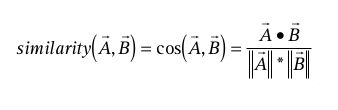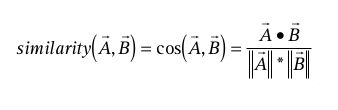

Nesse caso, teremos o vetor principal, onde as coordenadas serão os valores de atributos da pessoa que realizar a pesquisa, o que será comparado com todos as coordenadas (atributos) dos jogadores do fifa.   

Inciar criando um array onde serão armazenados apenas os valores númericos dos jogadores, ou seja as suas "coordenadas".

In [6]:
#Separando os atributos usados para a comparação
attributes = ['movement_sprint_speed', 'defending_marking_awareness', 'dribbling', 'attacking_finishing',"attacking_short_passing"]

#Transformando eles em um array de vetores
compare_attributes = players[attributes].values


In [7]:
#Exibindo o array
compare_attributes

array([[97., 26., 92., 94., 86.],
       [94., 38., 80., 96., 77.],
       [72., 66., 87., 85., 94.],
       ...,
       [66., 11., 46., 49., 44.],
       [56., 35., 46., 32., 54.],
       [60., 40., 45., 31., 51.]])

In [8]:
def search_player(player,array,dataset):
    
    #Fazendo o cálculo de similaridade por cosseno
    #np.dot calcula produto escalar, e  np.linalg.norm calcula a norma
    cos_similar = np.dot(array, player) / (np.linalg.norm(array, axis=1) * np.linalg.norm(player))

    # Criando um dataset com os índices dos jogadores
    similar_players = pd.Series(cos_similar, index=dataset.index)

    # Encontrando os 10 jogadores mais similares usando o .nlargest(10) que retorna os n maiores valores
    most_similar_indices = similar_players.nlargest(10).index
    most_similar_players = dataset.loc[most_similar_indices]

    return most_similar_players
    

In [9]:
search_player([97, 26, 92, 94, 86],compare_attributes,players)

,short_name,player_positions,movement_sprint_speed,defending_marking_awareness,dribbling,attacking_finishing,attacking_short_passing
0,K. Mbappé,"ST, LW",97,26,92.0,94,86
1493,T. Čvančara,"ST, RW",77,21,72.0,75,69
14752,J. Vetro,ST,65,18,62.0,62,58
61,Rodrygo,"RW, LW, ST",88,24,86.0,87,80
12122,M. Breunig,"ST, CAM",68,19,63.0,66,59
2378,C. Archer,ST,78,22,74.0,74,70
3332,M. Bolaños,"ST, CAM",80,21,76.0,75,70
13123,A. Heggebø,ST,67,19,62.0,64,58
4959,Lucas João,ST,74,20,70.0,71,63
4369,S. Mara,ST,74,18,68.0,71,65


In [10]:
#Em função de testar coloquei esses com a diferença de 1 dos dados E. Haaland	
search_player([93,37,79,95,76],compare_attributes,players)


,short_name,player_positions,movement_sprint_speed,defending_marking_awareness,dribbling,attacking_finishing,attacking_short_passing
1,E. Haaland,ST,94,38,80.0,96,77
4622,M. Osmajić,"ST, LM, RM",73,30,62.0,76,61
2480,O. Dabbagh,ST,74,30,67.0,79,62
1704,T. Kleindienst,ST,73,29,66.0,77,63
1721,M. Borja,ST,79,30,68.0,77,65
7390,V. Postolachi,"ST, RM",73,28,61.0,70,59
11903,J. Persson,ST,66,27,57.0,64,51
17442,H. Kargbo,"ST, CB",55,20,48.0,58,48
11788,V. Granath,ST,66,22,55.0,67,53
14323,M. Entrup,ST,66,25,59.0,65,55


In [11]:
search_player([41,27,45,36,46],compare_attributes,players)

,short_name,player_positions,movement_sprint_speed,defending_marking_awareness,dribbling,attacking_finishing,attacking_short_passing
10854,Max,"CAM, CF",61,40,68.0,51,69
12928,T. Geralnik,LM,60,39,63.0,53,68
2923,E. Vignato,"CAM, CM, LW",66,43,76.0,61,76
12885,K. Fayad,"CM, CDM, CAM",62,40,70.0,52,70
5933,T. Martínez,"CM, CAM, CF",69,45,72.0,61,74
17703,E. Kischka,CM,54,37,58.0,49,59
15863,V. Cherny,CAM,55,38,63.0,47,64
854,H. Elliott,"CAM, CM, RW",71,45,81.0,64,78
6935,N. Bellomo,"CM, CAM",67,44,70.0,59,71
13924,Y. López,"CM, CDM",55,38,62.0,53,65


In [12]:
search_player([70,51,32,93,67],compare_attributes,players)

,short_name,player_positions,movement_sprint_speed,defending_marking_awareness,dribbling,attacking_finishing,attacking_short_passing
5546,S. Tigges,ST,66,44,57.0,71,65
2259,L. Höler,"ST, CF",64,49,63.0,77,59
5883,L. Pavoletti,ST,67,44,61.0,72,65
14487,H. Smith,ST,53,42,52.0,61,55
10811,F. Pozzo,ST,64,33,58.0,75,56
12763,F. Schubert,ST,68,44,56.0,65,57
3078,P. Sabbag,ST,61,41,64.0,81,60
2636,A. Cornelius,ST,67,38,62.0,75,67
2621,M. Pérez,ST,90,42,63.0,83,60
4825,M. Kramer,ST,64,33,59.0,74,64


In [13]:

search_player([72., 66., 87., 85., 94.],compare_attributes,players)

,short_name,player_positions,movement_sprint_speed,defending_marking_awareness,dribbling,attacking_finishing,attacking_short_passing
2,K. De Bruyne,"CM, CAM",72,66,87.0,85,94
13993,D. Samek,"CDM, CM",53,49,65.0,64,71
2039,E. Vecchio,"CAM, CM",62,55,73.0,70,77
4009,T. Kempe,"CM, CAM",57,55,72.0,69,75
2791,Neviano Neves,"CM, RM",58,54,72.0,69,80
25,M. Ødegaard,"CAM, CM",71,67,87.0,82,90
5753,Álex López,"CM, CDM",55,54,67.0,64,73
5055,Eraso,"CM, CAM, CDM",54,47,66.0,66,70
2272,Guridi,"CAM, CM, CDM",61,53,76.0,72,78
754,L. Stindl,CAM,60,59,78.0,76,81


### 4º Passo - Criação do Gráfico de Comparação

Função que cria um gráfico comparando os valores do jogador usado como paramêtro, e os 10 mais parecidos com ele, que são calculados na função anterior.

In [80]:
def GraphSearch(player, data):

    #Colunas númericas
    columns = data.select_dtypes(include=['int', 'float']).columns

    #Armazenas uma lista pra cada jogador
    all_player = []

    for i in range(10):
        p = []
        for column in columns:
            p.append(data[column].iloc[i])
        all_player.append(p)

    for i in range(10):
        plt.plot(all_player[i])

    plt.plot(player, label= "Você")

    # Adicionando legenda, rótulos dos eixos e título
    plt.legend()
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.title('Gráfico Comparação Você vs. Jogadores')

    # Exibindo o gráfico
    plt.show()
    

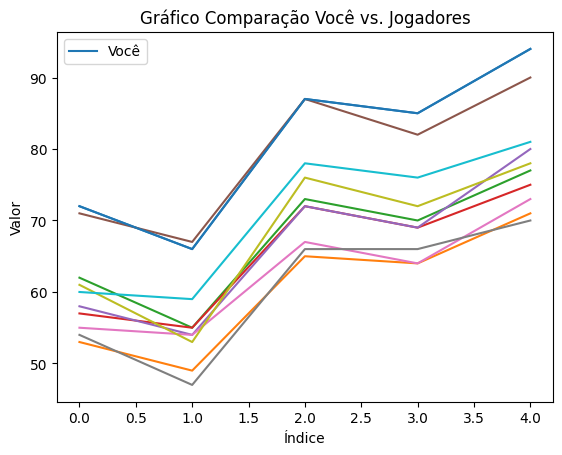

In [82]:
player = [72., 66., 87., 85., 94.]

dados = search_player(player,compare_attributes,players)

GraphSearch(player,dados)

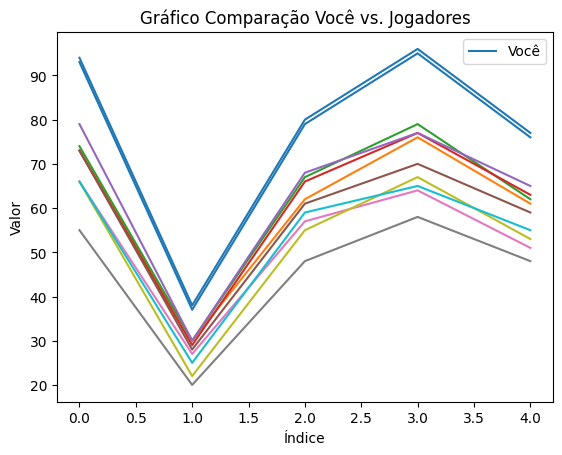

In [83]:

player = [93,37,79,95,76]

dados = search_player(player,compare_attributes,players)

GraphSearch(player,dados)

Nesse gráfico podemos ver 2 linhas muito próximas, quase se sobrepondo, isso se deve ao fato de que para comparação, coloquei o jogador de paramêtro com a diferença de 1 para os dados do E. Haaland, então como ele e Haaland são os mais próximos suas linhas ficaram muito perto uma das outras.

#### Aplicando a comparação em grandes jogadores atuais

**Cristiano Ronaldo**

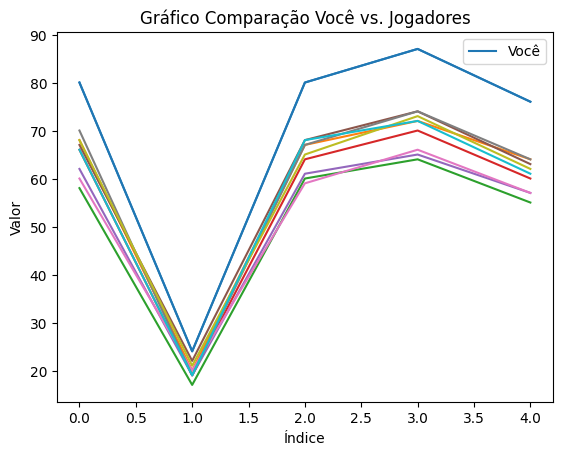

,short_name,player_positions,movement_sprint_speed,defending_marking_awareness,dribbling,attacking_finishing,attacking_short_passing
49,Cristiano Ronaldo,ST,80,24,80.0,87,76
7230,Iker Bravo,"ST, LW, RW",68,20,67.0,72,64
11135,F. Danho,ST,58,17,60.0,64,55
6183,Alisson Safira,ST,66,19,64.0,70,60
9615,J. Coburn,ST,62,19,61.0,65,57
3759,S. Surridge,ST,67,22,68.0,74,63
12851,M. Levato,ST,60,20,59.0,66,57
2847,Felipe Silva,ST,70,19,67.0,74,64
3560,Henrique Araújo,ST,68,21,65.0,73,62
4486,N. Cordero,ST,66,19,68.0,72,61


In [94]:
cr7 = [80, 24, 80, 87, 76]

dados = search_player(cr7,compare_attributes,players)

#Mostrar o dataframe com os 10 mais parecidos
dados

GraphSearch(cr7,dados)

dados

**Lionel Messi**

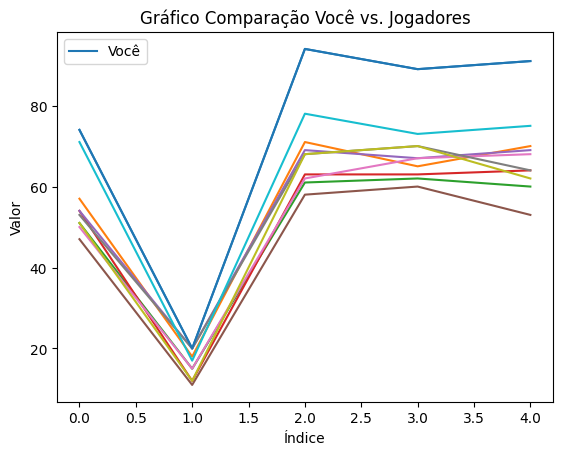

,short_name,player_positions,movement_sprint_speed,defending_marking_awareness,dribbling,attacking_finishing,attacking_short_passing
3,L. Messi,"CF, CAM",74,20,94.0,89,91
6923,R. Wolski,"CAM, CM",57,18,71.0,65,70
13073,Manu Garrido,ST,51,15,61.0,62,60
8265,João Carlos,ST,54,12,63.0,63,64
7005,W. Mendieta,"CAM, RM",54,20,69.0,67,69
15609,E. Zubak,ST,47,11,58.0,60,53
11185,M. El Ghezouani,ST,50,15,62.0,67,68
6875,D. Falcinelli,"ST, CF",53,20,68.0,70,64
10261,J. Arce,"CAM, LM, RM",51,12,68.0,70,62
1067,Claudio Coíntra,"CAM, CF",71,17,78.0,73,75


In [91]:

messi = [74, 20, 94.0, 89 ,91]

dados = search_player(messi,compare_attributes,players)

dados

GraphSearch(messi,dados)

dados

**Vinicius Júnior**

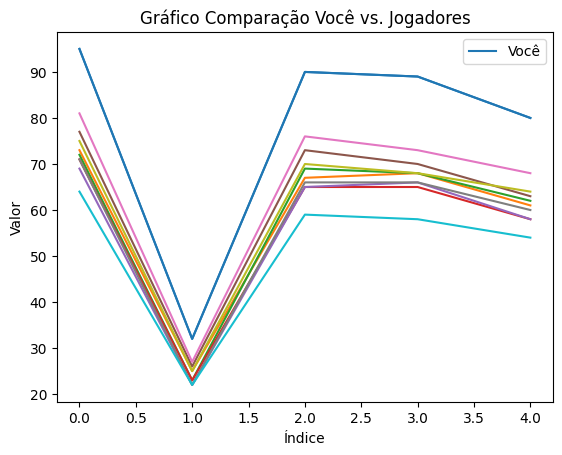

,short_name,player_positions,movement_sprint_speed,defending_marking_awareness,dribbling,attacking_finishing,attacking_short_passing
8,Vini Jr.,LW,95,32,90.0,89,80
6791,A. Seydel,"ST, LM, CAM",73,25,67.0,68,61
7736,Matheus Aiás,"ST, CAM",72,23,69.0,68,62
10101,Miguel Berry,ST,71,23,65.0,65,58
8528,N. Holm,ST,69,22,65.0,66,58
4578,Song Min Kyu,"LW, LM, RW",77,26,73.0,70,63
1798,N. Cambiaghi,"ST, CAM, LW",81,27,76.0,73,68
7329,N. Bonfanti,ST,71,22,66.0,66,60
10190,E. Baldini,"ST, CAM",75,25,70.0,68,64
14968,W. Goodwin,ST,64,22,59.0,58,54


In [97]:
vini = [95, 32, 90.0, 89, 80]

dados = search_player(vini,compare_attributes,players)

dados

GraphSearch(vini,dados)

dados